In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [131]:
dataset=pd.read_csv('male_players.csv')

/var/folders/dx/z5v01f653q55k4dkkb8ypf000000gn/T/ipykernel_22865/2926464104.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('male_players.csv')


In [132]:
dataset.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [133]:
new_df = dataset.filter(items=['overall','pace','shooting','passing','dribbling','defending','physic','player_positions'])

In [134]:
new_df.head()

,overall,pace,shooting,passing,dribbling,defending,physic,player_positions
0,91,97.0,90.0,80.0,92.0,36.0,78.0,"ST, LW"
1,91,89.0,93.0,66.0,80.0,45.0,88.0,ST
2,91,72.0,88.0,94.0,87.0,65.0,78.0,"CM, CAM"
3,90,80.0,87.0,90.0,94.0,33.0,64.0,"CF, CAM"
4,90,79.0,88.0,83.0,87.0,39.0,78.0,"CF, ST"


In [135]:
# Check null values in each column of the DataFrame
null_counts = new_df.isna().sum()
print(null_counts)

overall                 0
pace                20024
shooting            20024
passing             20024
dribbling           20024
defending           20024
physic              20024
player_positions        0
dtype: int64


In [136]:
new_df['player_positions']=new_df['player_positions'].str.split(',').str[0]

In [137]:
new_df['player_positions'].value_counts()

player_positions
CB     30861
ST     25644
CM     21128
GK     20025
CDM    14475
RB     13009
LB     12907
CAM    10950
LM     10024
RM      9974
RW      4009
LW      3731
CF      1126
RWB     1086
LWB     1072
Name: count, dtype: int64

In [138]:
new_df.head()
new_df = new_df[new_df['player_positions'] != 'GK']

In [139]:
labelencoder=LabelEncoder()
new_df['player_positions']=labelencoder.fit_transform(new_df['player_positions'])
new_df.head()

,overall,pace,shooting,passing,dribbling,defending,physic,player_positions
0,91,97.0,90.0,80.0,92.0,36.0,78.0,13
1,91,89.0,93.0,66.0,80.0,45.0,88.0,13
2,91,72.0,88.0,94.0,87.0,65.0,78.0,4
3,90,80.0,87.0,90.0,94.0,33.0,64.0,3
4,90,79.0,88.0,83.0,87.0,39.0,78.0,3


In [140]:
new_df['player_positions'].value_counts()

player_positions
1     30861
13    25644
4     21128
2     14475
9     13009
5     12907
0     10950
6     10024
10     9974
11     4009
7      3731
3      1126
12     1086
8      1072
Name: count, dtype: int64

In [141]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
target=new_df['overall']
new_df=new_df.drop(columns='overall')

In [142]:
scaled_df=scaler.fit_transform(new_df)

In [143]:
scaled_df = pd.DataFrame(scaled_df,columns=new_df.columns)


In [144]:
scaled_df.head()

,pace,shooting,passing,dribbling,defending,physic,player_positions
0,2.615838,2.710494,2.206079,2.919493,-0.918707,1.350565,1.635984
1,1.892759,2.926000,0.863498,1.745415,-0.375906,2.375611,1.635984
2,0.356218,2.566822,3.548660,2.430294,0.830318,1.350565,-0.385170
3,1.079296,2.494987,3.165065,3.115173,-1.099640,-0.084499,-0.609743
4,0.988911,2.566822,2.493775,2.430294,-0.737773,1.350565,-0.609743


In [145]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(scaled_df,target,test_size=0.25,random_state=10)

In [146]:
print(xtrain.shape,
ytrain.shape,
xtest.shape,
ytest.shape)

(119997, 7) (119997,) (39999, 7) (39999,)


In [147]:

model=RandomForestRegressor()



model.fit(xtrain, ytrain)
ytrainpred = model.predict(xtrain)
ytestpred = model.predict(xtest)
error_score1 = metrics.r2_score(ytrain, ytrainpred)
error_score2 = metrics.r2_score(ytest, ytestpred)
print(f'R2 ERROR FOR TRAIN OF MODEL  is {error_score1} ')
print(f'R2 ERROR FOR TEST OF MODEL  is {error_score2} ')
print('\n')

R2 ERROR FOR TRAIN OF MODEL  is 0.9955614975109641 
R2 ERROR FOR TEST OF MODEL  is 0.9688445439862364 




In [150]:
scaled_df.head()

,pace,shooting,passing,dribbling,defending,physic,player_positions
0,2.615838,2.710494,2.206079,2.919493,-0.918707,1.350565,1.635984
1,1.892759,2.926000,0.863498,1.745415,-0.375906,2.375611,1.635984
2,0.356218,2.566822,3.548660,2.430294,0.830318,1.350565,-0.385170
3,1.079296,2.494987,3.165065,3.115173,-1.099640,-0.084499,-0.609743
4,0.988911,2.566822,2.493775,2.430294,-0.737773,1.350565,-0.609743


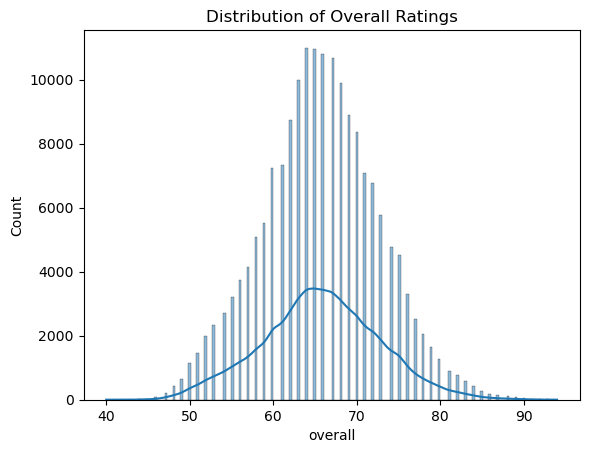

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of 'overall'
sns.histplot(dataset['overall'], kde=True)
plt.title('Distribution of Overall Ratings')
plt.show()

In [ ]:
casado=np.array([[60,54,61,66,61,53,2]])
casado=pd.DataFrame(casado,columns=scaled_df.columns)
casado=scaler.transform(casado)
print(model.predict(casado)) #actual rating is 64

[63.85]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
cubarsi=np.array([[67,23,46,56,67,63,1]])
cubarsi=pd.DataFrame(cubarsi,columns=scaled_df.columns)
cubarsi=scaler.transform(cubarsi)
print(model.predict(cubarsi)) #actual rating is 65

[65.36]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [155]:
haaland = np.array([[89, 93, 66, 80, 45, 88, 13]])
haaland = pd.DataFrame(haaland, columns=scaled_df.columns)
haaland_scaled = scaler.transform(haaland)
print("Haaland prediction:", model.predict(haaland_scaled))


Haaland prediction: [86.878]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [156]:
rodri = np.array([[66, 80, 86, 84, 87, 85, 2]])
rodri = pd.DataFrame(rodri, columns=scaled_df.columns)
rodri_scaled = scaler.transform(rodri)
print("Rodri prediction:", model.predict(rodri_scaled))


Rodri prediction: [86.74]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [157]:
filename='trainedmodel.sav'
pickle.dump(model,open(filename,'wb'))
filename='scaler.sav'
pickle.dump(scaler,open(filename,'wb'))